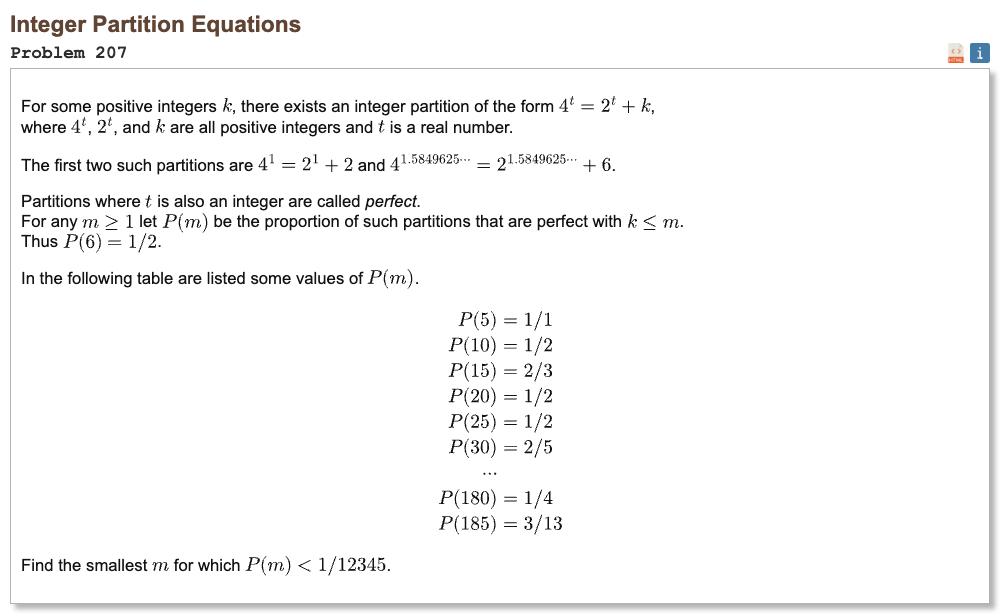

## Initial approach

* set x = 2^t, then 4^t becomes x^2, so the equation turns into k = x^2 - x = x(x-1)
* so each integer x gives exactly one k, and k grows as x grows
* counting how many k are ≤ m is the same as counting how many x satisfy x(x-1) ≤ m
* the biggest such x is about (1 + sqrt(1+4m)) / 2, so total count is xmax - 1 (since x starts at 2)
* a case is perfect only when t is an integer, meaning x = 2^t is a power of two
* so perfect k values happen at x = 2,4,8,16,… which gives k = 2^n(2^n-1)
* as m increases, total count grows almost like sqrt(m) but perfect count grows slowly, so the ratio keeps dropping
* we increase n, jump m to the first place where total is bigger than 12345*n, then that m is the earliest point where the ratio goes below 1/12345

In [1]:
import math

def k_of_pow(n: int) -> int:
    x = 1 << n
    return x * (x - 1)

def total_partitions(m: int) -> int:
    s = math.isqrt(1 + 4 * m)
    xmax = (1 + s) // 2
    return xmax - 1

def perfect_partitions(m: int) -> int:
    n = 1
    cnt = 0
    while True:
        if k_of_pow(n) <= m:
            cnt += 1
            n += 1
        else:
            return cnt

target = 12345
n = 1
result = None

while True:
    k_n = k_of_pow(n)
    k_next = k_of_pow(n + 1)

    need_xmax = target * n + 2
    m_req = ((2 * need_xmax - 1) ** 2 - 1 + 3) // 4
    if m_req < k_n:
        m_req = k_n

    if m_req < k_next:
        m = m_req
        total = total_partitions(m)
        if target * n < total:
            result = m
            break

    n += 1

print("Result:", result)

Result: 44043947822
